<a href="https://colab.research.google.com/github/JoaoVitorMarques14/JoaoMarques/blob/master/Visualiza%C3%A7%C3%A3o_de_Dados_com_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 2.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Visualização de Dados com Pandas

Visualização de dados é algo muito importante para um projeto de *Data Science*.

Apesar de termos o Módulo 3 totalmente dedicado a essa finalidade, queria dar uma breve introdução de como o próprio Pandas é capaz de plotar gráficos a partir de um *DataFrame*.

Como exemplo, vamos importar mais uma vez os dados da ação BBAS3 do `csv`. No entanto, desta vez vamos fazer uma coisa diferente.

Como cada linha representa um dia de pregão da Bolsa de Valores, faz sentido que nosso índice (*index*) seja a coluna `Date`. Também quero que o Pandas leia essa coluna como sendo uma data, convertendo `strings` do tipo `2018-09-21` em variáveis do tipo `datetime`.

In [ ]:
# importar pandas
import pandas as pd

# importar o arquivo csv para o Pandas
df = pd.read_csv("https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/BBAS3.SA.csv",
                parse_dates=True, index_col='Date')

# ver as primeiras entradas


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-05-06,49.470001,49.669998,49.180000,49.369999,46.886795,6314800.0
2019-05-07,49.080002,49.680000,48.220001,49.490002,47.000763,10846100.0
2019-05-08,49.500000,50.840000,49.500000,50.590000,48.045422,14459600.0
2019-05-09,50.910000,51.259998,50.119999,51.029999,48.463291,15377500.0
2019-05-10,51.099998,51.189999,49.860001,50.160000,47.637051,8975300.0


In [ ]:
# o index se tornou um datetime
df.index

DatetimeIndex(['2019-05-06', '2019-05-07', '2019-05-08', '2019-05-09',
               '2019-05-10', '2019-05-13', '2019-05-14', '2019-05-15',
               '2019-05-16', '2019-05-17',
               ...
               '2020-04-17', '2020-04-20', '2020-04-22', '2020-04-23',
               '2020-04-24', '2020-04-27', '2020-04-28', '2020-04-29',
               '2020-04-30', '2020-05-04'],
              dtype='datetime64[ns]', name='Date', length=248, freq=None)

## Gráfico de Linhas

Vamos supor que você quisesse visualizar como foram as máximas das ações do Banco do Brasil.

Vimos lá atrás que é possível selecionar apenas uma coluna de um *DataFrame*. Neste exemplo, vou selecionar a variável `High` usando `df['High']'.

Em seguida, a unica coisa que eu faço é executar o método `plot()`

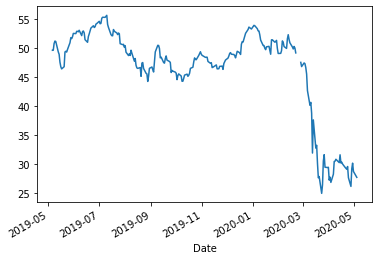

In [ ]:
df['High'].plot();

## Histograma

Quando se quer ter uma noção de quantas vezes uma determinada informação aparece no conjunto de dados, plotar o histograma pode ser de grande valor.

Histogramas são uma das principais ferramentas da estatística para extrair informações sobre frequencia e distribuição dos nossos dados. Ele é conceitualmente bem simples. Se você nunca teve contato com esse tipo de gráfico, recomendo assistir a [este vídeo da Khan Academy](https://www.youtube.com/watch?v=L0f8d3B8dk4).

Vamos plotar o histograma do volume movimentado para as ações do BBAS3.

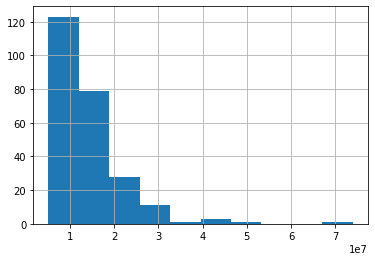

In [ ]:
# plotar histograma do volume
df['Volume'].hist();

## Gráfico de Dispersão (*Scatter Plot*)

O gráfico de dispersão é um gráfico ideal para ver a correlação entre duas variáveis quaisquer.

Serve não apenas para mostrar quanto uma variável é afetada por outra, mas também para plotar coordenadas geográficas para ter um *awareness* (como foi feito no projeto do Módulo 1).

Como não faz sentido com os dados do BBAS3, vou trabalhar com outro *dataset*. Vamos usar dados de consumo de cerveja em uma região universitária da cidade de São Paulo.

Para mais informações sobre os dados, acesse [este link](https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo).

In [ ]:
# importar dados de consumo de cerveja
df_cerveja = pd.read_csv("https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/consumo_cerveja.csv")

# ver as 5 primeiras entradas
df_cerveja.head()

,data,media,minima,maxima,precipitacao,fds,consumo
0,2015-01-01,27.30,23.9,32.5,0.0,0.0,25.461
1,2015-01-02,27.02,24.5,33.5,0.0,0.0,28.972
2,2015-01-03,24.82,22.4,29.9,0.0,1.0,30.814
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799
4,2015-01-05,23.82,21.0,28.3,0.0,0.0,28.900


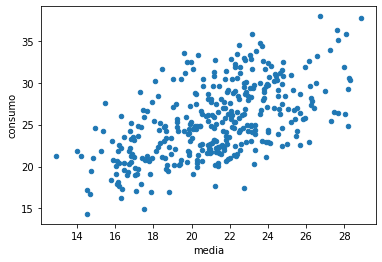

In [ ]:
# plotar um gráfico de dispersão
df_cerveja.plot.scatter('media', 'consumo')

*Os dados usados acima não são os originais, sofreram um processo rápido de limpeza. Caso você queira veer como foi feito, acesse a célula de código abaixo.*

In [1]:
#@title
# importar dados original de consumo de cerveja 
df_cerveja_original = pd.read_csv("https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/consumo_cerveja_original.csv")
df_cerveja_original.dropna(inplace=True)

# trocar nomes das colunas
df_cerveja_original.columns= ['data', 'media', 'minima', 'maxima','precipitacao', 'fds', 'consumo']

df_cerveja_original.media = df_cerveja_original.media.apply(lambda x: float(x.replace(",", ".")))
df_cerveja_original.minima = df_cerveja_original.minima.apply(lambda x: float(x.replace(",", ".")))
df_cerveja_original.maxima = df_cerveja_original.maxima.apply(lambda x: float(x.replace(",", ".")))
df_cerveja_original.precipitacao = df_cerveja_original.precipitacao.apply(lambda x: float(x.replace(",", ".")))

# exportar para csv
df_cerveja_original.to_csv('consumo_cerveja.csv', index=False)

NameError: ignored

## Boxplot

Boxplot é um dos tipos de gráficos que conseguem fornecer o maior número de informações estatísticas de uma vez só.

<center><img src="https://pro.arcgis.com/en/pro-app/help/analysis/geoprocessing/charts/GUID-0E2C3730-C535-40CD-8152-80D794A996A7-web.png" height="200px"></center>

É possível ter em uma imagem os valores máximos, mínimos, quartis e mediana. *Outliers* também são representados como pontos acima do valor máximo ou abaixo do valor mínimo

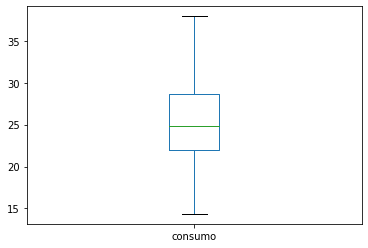

In [ ]:
# plotar o boxplot para os valores máximos de consumo de cerveja
df_cerveja.consumo.plot(kind="box");

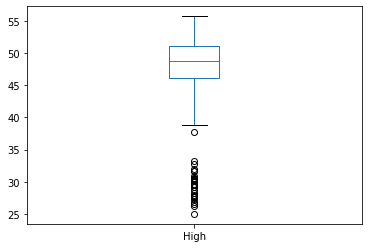

In [ ]:
# plotar o boxplot para os valores máximos da ação
df.High.plot(kind="box");